## Review of SVD


Last time we showed that there exists a singular value decomposition in the form  $\bf{A=U{\Sigma}V^T} $. To result in this composition, we require  $\bf U $ as an orthogonal basis of  $\mathbb{R}^m $,  $\bf V $ as an orthogonal basis of  $\mathbb{R}^n $, and  $\bf{\Sigma} $ as an  $m \times n $ diagonal matrix, where  $\bf{Av_i = \sigma_iu_i} $.

*    ${\bf U} $ is an  $m \times m $ orthogonal matrix whose columns are eigenvectors of  ${\bf A} {\bf A}^T $, called the **left singular vectors** of  ${\bf A} $.

*    ${\bf V} $ is an  $n \times n $ orthogonal matrix whose columns are eigenvectors of  ${\bf A}^T {\bf A} $, called the **right singular vectors** of  ${\bf A} $.

*    ${\bf \Sigma} $ is an  $m \times n $ diagonal matrix, composed of the square root of the eigenvalues of  $A^TA $. The diagonal entries are called the **singular values** of  ${\bf A} $. **singular values are always non-negative**.


In addition, we define a reduced form:  ${\bf A} = {\bf U_{R}} {\bf \Sigma_{R}} {\bf V_R}^T $ where  ${\bf U_R} $ is an  $m \times k $ matrix,  ${\bf V_R} $ is an  $n \times k $ matrix, and  ${\bf \Sigma_{R}} $ is an  $k \times k $ diagonal matrix and  $k = \min(m,n) $.

The induced 2-norm of a matrix  ${\bf A} $ can be obtained using the SVD of the matrix:

\\[\begin{align} \| {\bf A} \|_2 &= \max_{\|y\|=1} \|\mathbf{ \Sigma} y\| \end{align}\\]

hence,

\\[\| {\bf A} \|_2= \sigma_1\\]

Following the same derivation as above, we can show that for a full rank  $n \times n $ matrix we have:

\\[\| {\bf A}^{-1} \|_2= \frac{1}{\sigma_n}\\]

where  ${\sigma_n} $ is the smallest singular value.

For non-square matrices, we can use the definition of the pseudoinverse (regardless of the rank):

\\[\| {\bf A}^{+} \|_2= \frac{1}{\sigma_r}\\]

where  ${\sigma_r} $ is the smallest **non-zero** singular value.


The 2-norm condition number of a matrix  ${\bf A} $ is given by the ratio of its largest singular value to its smallest singular value:

\\[\text{cond}_2(A) = \|{\bf A}\|_2 \|{\bf A}^{-1}\|_2 = \sigma_{\max}/\sigma_{\min}.\\]


The best rank- $k $ approximation for a  $m \times n $ matrix  ${\bf A} $, where  $k < s = \min(m,n) $, for some matrix norm  $\|.\| $, is one that minimizes the following problem:

\\[\begin{aligned} &\min_{ {\bf A}_k } \ \|{\bf A} - {\bf A}_k\| \\ &\textrm{such that} \quad \mathrm{rank}({\bf A}_k) \le k. \end{aligned}\\]

Under the induced  $2 $\-norm, the best rank- $k $ approximation is given by the sum of the first  $k $ outer products of the left and right singular vectors scaled by the corresponding singular value (where,  $\sigma_1 \ge \dots \ge \sigma_s $):

\\[{\bf A}_k = \sigma_1 \bf{u}_1 \bf{v}_1^T + \dots \sigma_k \bf{u}_k \bf{v}_k^T\\]


If  $\bf A $ is an  $n \times n $ square matrix and we want to solve  $\bf{Ax=b} $, we can use the SVD for A such that

\\[\bf{U{\Sigma}V^Tx=b}\\] \\[\bf{ {\Sigma} V^Tx=U^Tb}\\]

Solve:  $\bf{\Sigma y=U^Tb} $ (diagonal matrix, easy to solve)

Evaluate:  $\bf{x=Vy} $
  

In [1]:
from numpy import diag, zeros,vstack
from numpy.random import rand, seed
from numpy.linalg import svd, pinv

seed (12345)

n=5
p=8
X = rand(n,p)
y = rand(n,1)
U,S,VT = svd(X)
Sigma = diag(1/S)
# compute pseudo inverse
pseudo_inv = VT.T @ vstack((Sigma, zeros((p-n,n)))) @ U.T
b = pseudo_inv @ y
#b = pinv(X) @ y #remove comment for the built-in pseudo inverse
print(X @ b - y)

[[ 3.33066907e-16]
 [-8.88178420e-16]
 [ 0.00000000e+00]
 [-5.55111512e-17]
 [-5.55111512e-17]]


# Quadratic form

A _quadratic form_ is a function with form $Q(\mathbf{x})=\mathbf{x}^TA\mathbf{x}$, where $A$ is an $n\times n$ (often symmetric matrix), which is called the _the matrix of the quadratic form_.

-------

Consider the following quadratic equation:


$$f({x}) = ax_1^2 +(b+c)x_1x_2 + dx_2^2$$



------


These quadratic forms can be generated by matrices:

$$ f({x})= \begin{bmatrix}
    x_1 & x_2
\end{bmatrix}\begin{bmatrix}
    a & b\\\\
    c & d
\end{bmatrix}\begin{bmatrix}
    x_1\\\\
    x_2
\end{bmatrix} = {x^\text{T}Ax}$$



Note that the same quadratic form can be obtained from infinite number of matrices $A$ by changing $b$ and $c$ while preserving their sum. We usually
consider making $A$ symmetric.

### Example

$$ {x} = \begin{bmatrix}
    x_1\\\\
    x_2
\end{bmatrix}$$

and

$$ {A}=\begin{bmatrix}
    6 & 2\\\\
    2 & 3
\end{bmatrix}$$

$$\begin{align*}
{x^\text{T}Ax}&=
\begin{bmatrix}
    x_1 & x_2
\end{bmatrix}
\begin{bmatrix}
    6 & 2\\\\
    2 & 3
\end{bmatrix}
\begin{bmatrix}
    x_1\\\\
    x_2
\end{bmatrix}\\\\
&=
\begin{bmatrix}
    x_1 & x_2
\end{bmatrix}
\begin{bmatrix}
    6 x_1 + 2 x_2\\\\
    2 x_1 + 3 x_2
\end{bmatrix}\\\\
&=
x_1(6 x_1 + 2 x_2) + x_2(2 x_1 + 3 x_2)\\\\
&=
6 x_1^2 + 4 x_1x_2 + 3 x_2^2
\end{align*}$$

If $A$
 is a diagonal matrix, the quadratic form of ${x^\text{T}Ax}$
 will have no cross term.

To convert a matrix of quadratic form into diagonal matrix, i.e. no cross products terms, consider $A$, which is symmetric, so there is an orthonormal $P$ that

$$
PDP^T = A \qquad \text{and}\qquad PP^T = I
$$

We can show that

$$
\mathbf{x}^TA\mathbf{x}=\mathbf{x}^TIAI\mathbf{x}=\mathbf{x}^TPP^TAPP^T\mathbf{x}=\mathbf{x}^TPDP^T\mathbf{x}=(P^T\mathbf{x})^TDP^T\mathbf{x}=\mathbf{y}^T D \mathbf{y}$$

where $P^T$ defined a coordinate transformation and $\mathbf{y} = P^T\mathbf{x}$.

Consider $A$

$$
A =
\left[
\begin{matrix}
6 & 2\\
2 & 3
\end{matrix}
\right]
$$

Find eigenvalue and eigenvectors:

In [2]:
A = np.array([[6,2],[2,3]]); A

NameError: name 'np' is not defined

In [ ]:
D, P = np.linalg.eig(A)
D = np.diag(D); D

array([[7., 0.],
       [0., 2.]])

Test if $P$ is normalized.

In [ ]:
P.T@P

array([[1., 0.],
       [0., 1.]])

We can compute $\mathbf{y}= P^T\mathbf{x}$

In [ ]:
import sympy as sy;
x1, x2 = sy.symbols('x1 x2')
x = sy.Matrix([[x1], [x2]])
x

Matrix([
[x1],
[x2]])

In [ ]:
def round_expr(expr, num_digits):
    return expr.xreplace({n : round(n, num_digits) for n in expr.atoms(sy.Number)})
P = round_expr(sy.Matrix(P), 4); P

Matrix([
[0.8944, -0.4472],
[0.4472,  0.8944]])

In [ ]:
y = P.T*x; y

Matrix([
[ 0.8944*x1 + 0.4472*x2],
[-0.4472*x1 + 0.8944*x2]])

The transformed quadratic form $\mathbf{y}^T D \mathbf{y}$ is

In [ ]:
D =  round_expr(sy.Matrix(D),4);D

Matrix([
[7.0, 0.0],
[0.0, 2.0]])

In [ ]:
y1, y2 = sy.symbols('y1 y2')
y = sy.Matrix([[y1], [y2]]);y

Matrix([
[y1],
[y2]])

In [ ]:
y.T*D*y

Matrix([[7.0*y1**2 + 2.0*y2**2]])

This change of variable leads to removing the cross terms in our quadratic equation. Without the cross term, it will then be easier to characterize the function and eventually optimize it (i.e finding its maximum or minimum).

# The Principal Axes

We can use $D$ to simplify our quadratic equation and remove the cross terms:

 $$ {D}=
\begin{bmatrix}
    7 & 0\\\\
    0 & 2
\end{bmatrix}$$

$$ \begin{align*}
{x^\text{T}Ax}
&=
{y^\text{T}{D} y}\\\\
&=
{y}^\text{T}
\begin{bmatrix}
    7 & 0\\\\
    0 & 2
\end{bmatrix}
{y}\\\\
&=
\begin{bmatrix}
    y_1 & y_2
\end{bmatrix}
\begin{bmatrix}
    7 & 0\\\\
    0 & 2
\end{bmatrix}
\begin{bmatrix}
    y_1\\\\
    y_2
\end{bmatrix}\\\\
&=
\begin{bmatrix}
    7y_1 +0y_2 & 0y_1 + 2y_2
\end{bmatrix}
\begin{bmatrix}
    y_1\\\\
    y_2
\end{bmatrix}\\\\
&=
7y_1^2 + 2y_2^2
\end{align*}$$


This form (without cross-term) is called the **principal axes form**.
The principal axes form can be found with
$${x^\text{T}Ax} = \lambda_1y_1^2 + \lambda_2y_2^2$$

where $λ_1$
 is the eigenvalue corresponding to the first eigenvector and $λ_2$
 the eigenvalue corresponding to the second eigenvector.

## Visualize the Quadratic Form

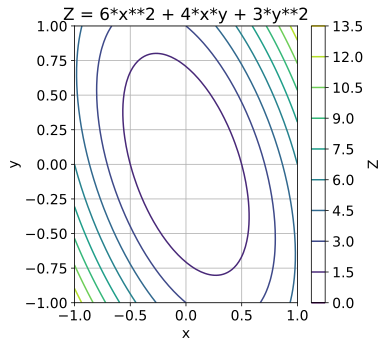

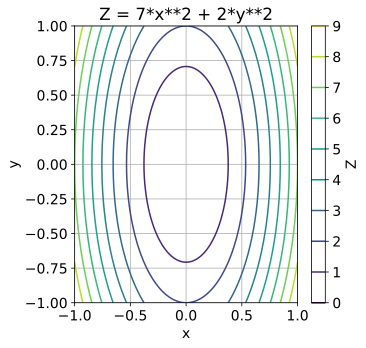

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Define the quadratic form function
def quadratic_form1(x, y):
    return 6*x**2 + 4*x*y + 3*y**2

def quadratic_form2(x, y):
    return 7*x**2 + 2*y**2

# 2. Create a grid of points
x_range = np.linspace(-1, 1, 100)
y_range = np.linspace(-1, 1, 100)
X, Y = np.meshgrid(x_range, y_range)

# 3. Calculate the function values
Z1 = quadratic_form1(X, Y)
Z2 = quadratic_form2(X, Y)

# 4. Plot the contour lines
plt.figure(figsize=(5, 5))
plt.contour(X, Y, Z1, levels=10, cmap='viridis') # Plot 10 level curves

plt.colorbar(label='Z')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Z = 6*x**2 + 4*x*y + 3*y**2')
plt.grid(True)
plt.show()

plt.figure(figsize=(5, 5))
plt.contour(X, Y, Z2, levels=10, cmap='viridis') # Plot 10 level curves

plt.colorbar(label='Z')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Z = 7*x**2 + 2*y**2')
plt.grid(True)
plt.show()

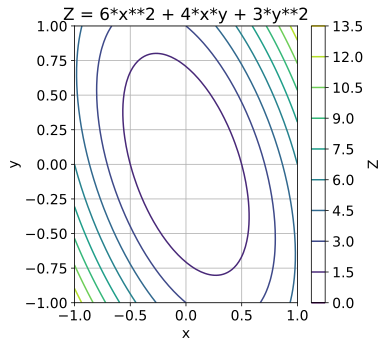

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

A = np.array([[6,2], [2,3]])
n_points = 100

u = np.linspace(-1, 1, 100)
x, y = np.meshgrid(u, u)

X = np.vstack([x.flatten(), y.flatten()])
f_x = np.dot(np.dot(X.T, A), X)
f_x = np.diag(f_x).reshape(n_points, n_points)


plt.figure(figsize=(5, 5))
plt.contour(x, y, f_x, levels=10, cmap='viridis') # Plot 10 level curves

plt.colorbar(label='Z')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Z = 6*x**2 + 4*x*y + 3*y**2')
plt.grid(True)
plt.show()

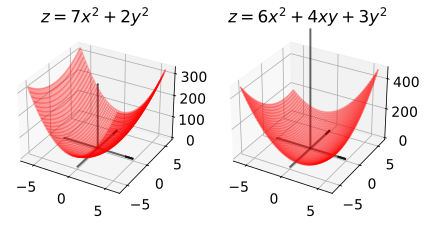

In [ ]:

k = 6
x = np.linspace(-k, k)
y = np.linspace(-k, k)
X, Y = np.meshgrid(x, y)

fig = plt.figure(figsize = (7, 7))

########################### xAx 1 ############################
Z = 7*X**2 + 2*Y**2
ax = fig.add_subplot(221, projection='3d')
ax.plot_wireframe(X, Y, Z, linewidth = 1.5, alpha = .3, color = 'r')
ax.set_title('$z = 7x^2+2y^2$')

xarrow = np.array([[-5, 0, 0, 10, 0, 0]])
X1, Y1, Z1, U1, V1, W1 = zip(*xarrow)
ax.quiver(X1, Y1, Z1, U1, V1, W1, length=1, normalize=False, color = 'black',
          alpha = .6, arrow_length_ratio = .12, pivot = 'tail',
          linestyles = 'solid',linewidths = 2)

yarrow = np.array([[0, -5, 0, 0, 10, 0]])
X2, Y2, Z2, U2, V2, W2 = zip(*yarrow)
ax.quiver(X2, Y2, Z2, U2, V2, W2, length=1, normalize=False, color = 'black',
          alpha = .6, arrow_length_ratio = .12, pivot = 'tail',
          linestyles = 'solid',linewidths = 2)

zarrow = np.array([[0, 0, -3, 0, 0, 300]])
X3, Y3, Z3, U3, V3, W3 = zip(*zarrow)
ax.quiver(X3, Y3, Z3, U3, V3, W3, length=1, normalize=False, color = 'black',
alpha = .6, arrow_length_ratio = .001, pivot = 'tail',
          linestyles = 'solid',linewidths = 2)

########################### xAx 2 ############################
Z = 6*X**2 + 4*X*Y + 3*Y**2
ax = fig.add_subplot(222, projection='3d')
ax.plot_wireframe(X, Y, Z, linewidth = 1.5, alpha = .3, color = 'r')
ax.set_title('$z = 6x^2 + 4xy + 3y^2$')
xarrow = np.array([[-5, 0, 0, 10, 0, 0]])
X1, Y1, Z1, U1, V1, W1 = zip(*xarrow)
ax.quiver(X1, Y1, Z1, U1, V1, W1, length=1, normalize=False, color = 'black',
          alpha = .6, arrow_length_ratio = .12, pivot = 'tail',
          linestyles = 'solid',linewidths = 2)

yarrow = np.array([[0, -5, 0, 0, 10, 0]])
X2, Y2, Z2, U2, V2, W2 = zip(*yarrow)
ax.quiver(X2, Y2, Z2, U2, V2, W2, length=1, normalize=False, color = 'black',
          alpha = .6, arrow_length_ratio = .12, pivot = 'tail',
          linestyles = 'solid',linewidths = 2)

zarrow = np.array([[0, 0, -3, 0, 0, 800]])
X3, Y3, Z3, U3, V3, W3 = zip(*zarrow)
ax.quiver(X3, Y3, Z3, U3, V3, W3, length=1, normalize=False, color = 'black',
          alpha = .6, arrow_length_ratio = .001, pivot = 'tail',
          linestyles = 'solid',linewidths = 2)

plt.show()

## Principal Component Analysis (PCA)

---

Exploratory data analysis is an approach of analyzing data sets to summarize their main characteristics. Consider data sampled from a low-dimensional space with added noise

\begin{equation}
X_i \sim U(S^k) + N(0,\sigma^2)
\end{equation}

We'll refer to the data $\{X_i\}$ as a point cloud.  Let's represent this point cloud using an $n\times d$ numpy array, where $n$ is the number of samples, and $d$ is the dimension of the space:

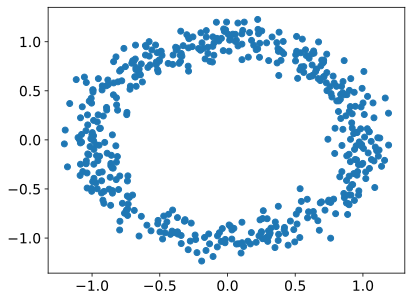

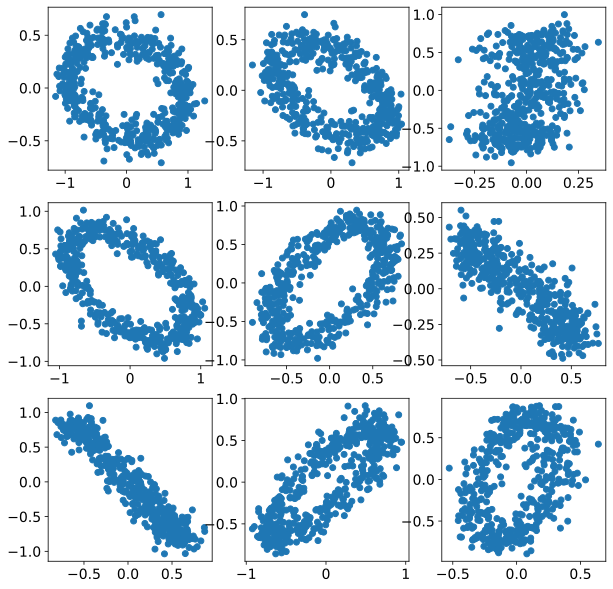

In [ ]:
def sample_noisy_data(n, **kw):
    """
    Sample n points uniformly at random from the k-sphere
    embedded in d dimensions.

    Add normal nosie with variance sigma

    Arguments:
        n - number of samples

    Optional arguments:
        r - radius of circle (default 1.0)
        k - dimension of sphere (default k = 1 == circle)
        sigma - noise variance (default 0.1)
        d - dimension of embedded space (default k+1)
    """

    r = kw.get('r', 1.0)
    k = kw.get('k', 1)
    sigma = kw.get('sigma', 0.1)
    d = kw.get('d', k+1) # dimension of space

    X = np.random.randn(n,k+1) # generate random samples from standard normal distribution
    X = r * X / np.linalg.norm(X, axis=1).reshape(n,-1) # project onto sphere

    # taking the Q factor of QR factorization of random normal matrix to sample random subspaces
    Q, R = np.linalg.qr(np.random.randn(d, k+1))
    X = X @ Q.T # apply random rotation

    return X + sigma*np.random.randn(n,d)

X = sample_noisy_data(500)

plt.scatter(X[:,0], X[:,1])
plt.show()

m, n = 3,3
fig, ax = plt.subplots(m,n, figsize=(10,10))
for i in range(m):
    for j in range(n):
        X = sample_noisy_data(500, d=5)

        ax[i,j].scatter(X[:,0], X[:,1])

plt.show(fig)

In [ ]:

# Plotly lets you create Javascript visualizations

import plotly
import plotly.graph_objects as go

X = sample_noisy_data(500, d=3)
fig = go.Figure(data=[go.Scatter3d(x=X[:,0], y=X[:,1], z=X[:,2],
                                   mode='markers', marker=dict(size=1))])
fig.show()

In [ ]:
def quick_scatter(X):
    fig = go.Figure(data=[go.Scatter3d(x=X[:,0], y=X[:,1], z=X[:,2],
                                   mode='markers',marker=dict(size=1))])
    fig.show()

quick_scatter(X)

## Dimension Reduction

Dimensionality reduction, or dimension reduction, is the transformation of data from a high-dimensional space into a low-dimensional space so that the low-dimensional representation retains some meaningful properties of the original data, ideally close to its intrinsic dimension. It can be thought of data being sampled from a low-dimensional (parameter) space, but embedded in a high-dimensional feature space (perhaps with some noise).

Working in high-dimensional spaces can be undesirable for many reasons; raw data are often sparse as a consequence of the curse of dimensionality, and analyzing the data is usually computationally intractable.

### Principal Component Analysis (PCA)

The simplest way to reduce the dimension of real-valued data is through a linear projection.

In [ ]:
X = sample_noisy_data(500, d=100, sigma=0.1)
Q, R = np.linalg.qr(np.random.randn(X.shape[1], 3))
X2 = X @ Q # a random projection isn't useful.

quick_scatter(X)

A random projection above isn't useful. PCA can be used to find the best $d$-dimensional subspace as the $d$-dimensional subspace with the largest variance in the data.

Consider an independent, identically distributed dataset, $X=\{x_1,x_2, \cdots, x_n\}$, where $x_i\in{\mathbb R}^D$, with mean 0 that possesses the data covariance matrix:
$$\hat{\Sigma} = \frac{1}{n}\sum_{i=1}^N x_ix_i^T= \frac{1}{n}X^T X$$
Note that $X$ is a $D \times N$ matrix, and $\hat{\Sigma}$ empirical covariance matrix, which is symmetric, positive semidefinite.

Let $v$ be a unit vector.  The projection onto the subspace spanned by $v$ is calculated as $X v$.  $Xv$ will also have zero mean. The variance in this 1-dimensional subspace is then
$$\sigma(v) = \frac{1}{n} (Xv)^T (Xv) = \frac{1}{n} v^T X^T X v$$

So the subspace with the largest variance is defined by the unit vector $v$ which maximizes
$$v^T (\frac{1}{n} X^T X) v = v^T \hat{\Sigma} v,$$
which can be written as the variational problem

$$
\operatorname{maximze}_{v\in \mathbb{R}^n} v^T \hat{\Sigma} v\\
\text{subject to } \|v\|_2 = 1
$$

This is the same problem as finding the largest magnitude eigenpair of $\hat{\Sigma}$, where $v$ is the eigenvector, and the eigenvalue of $v$ is $\sigma(v)$.

If we want to project into a $k+1$ dimensional space, we then find
$$
\operatorname{maximze}_{v\in \mathbb{R}^n} v^T \hat{\Sigma} v\\
\text{subject to } \|v\|_2 = 1, v^T V_k = 0
$$
where $V_k = [v_1,\dots,v_k]$ spans the optimal $k$-dimensional subspace.

This boils down to finding the largest $k+1$ dimensional eigenspace of $\hat{\Sigma}$.

The vectors $v_1,\dots, v_k$ are known as the **principal components** of $X$.

<img src="https://drive.google.com/uc?export=view&id=1Jx-VHWS9R9IIBnmKUML65Bm9UsdxP2X6" width="500">

[//]: #![](https://drive.google.com/uc?export=view&id=1Jx-VHWS9R9IIBnmKUML65Bm9UsdxP2X6)

<img src="https://drive.google.com/uc?export=view&id=1pdHwgq6dy0jKqZKY9L_Nv2diacu3h1FG" width="500">


[//]: #![](https://drive.google.com/uc?export=view&id=1pdHwgq6dy0jKqZKY9L_Nv2diacu3h1FG)

PCA as a dimensionality reduction algorithm maximizes the variance in the low-dimensional representation of the data to retain as much information as possible. We can obtain the basis of the principal subspace as the eigenvectors that are associated with the largest eigenvalues of the data covariance matrix:

$$\hat{\Sigma} = \frac{1}{n}\sum_{i=1}^N x_ix_i^T= \frac{1}{n}X^T X$$


If $X = U \Sigma V^T$ then
$$X^T X = V \Sigma^T U^T U \Sigma V^T = V \Sigma^2 V^T$$
Clearly, the right-singular vectors $V$ are the eigenvectors of $X^T X$. With this, we get that the columns of $V$ are the
eigenvectors of $XX^T$ (and therefore $\hat{\Sigma}$). Furthermore, the eigenvalues of $\hat{\Sigma}$, $\lambda_d$, are related to the singular values of $X$ by:
$$\lambda_d = \frac{\sigma^2_d}{N}$$
This relationship between the eigenvalues of $\hat{\Sigma}$ and the singular values of $X$ provides the connection between the maximum variance view and the singular value decomposition. Therefore we can perform an eigendecomposition and compute the eigenvalues and eigenvectors of $\hat{\Sigma}$ directly.
We use a singular value decomposition of $\hat{\Sigma}$, which is symmetric and factorizes into $XX^T$ (ignoring the factor N), and the eigenvalues of $\hat{\Sigma}$ are the squared singular values of $X$.

<img src="https://drive.google.com/uc?export=view&id=1mf9JeCyUEX917uXK_-aTbducFyuBkk5p" width="500">

In [ ]:
def mean_center(X):
    mu = np.average(X, axis=0) # 1^T X / n
    return X - mu

def variance(X):
    n = X.shape[0]
    X = mean_center(X)
    X = X/np.std(X)
    return X.T @ X / n

def principal_vectors(X, k=3):
    Sigma = variance(X)
    lam, V = np.linalg.eigh(Sigma)
    return V[:,-k:] # eigenvalues in increasing order

def pca_projection(X, k=3):
    V = principal_vectors(X, k=k)
    return X @ V


X = sample_noisy_data(1000, d=100, sigma=0.1)

Xpca = pca_projection(X, k=3)

quick_scatter(Xpca)


#### PCA Via SVD

In practice, you **should not** compute PCA by forming $X^T X$.  Why?  Because if $X$ is ill-conditioned, then $X^T X$ will be even more ill conditioned.

What you should do is use the SVD of $X$.  If $X = U \Sigma V^T$ then
$$X^T X = V \Sigma^T U^T U \Sigma V^T = V \Sigma^2 V^T$$
Clearly, the right-singular vectors $V$ are the eigenvectors of $X^T X$.

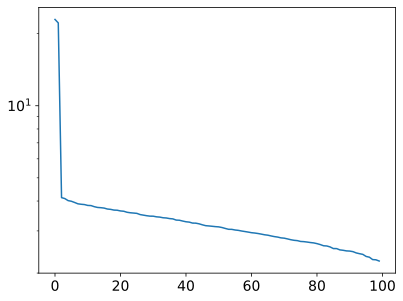

In [ ]:
X = sample_noisy_data(1000, d=100, sigma=0.1)
u, s, v = np.linalg.svd(X)
plt.semilogy(s)
plt.show()

#Example:

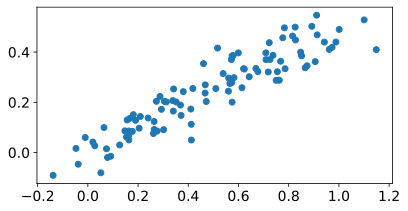

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#Clean data along a line
x = np.arange(0,1,0.01)
y = x/2
X = np.vstack((x,y)).T
n = len(x)

#Add some noise
X = X + 0.05*np.random.randn(n,2)

#Plot data
plt.figure()
plt.scatter(X[:,0],X[:,1])
plt.gca().set_aspect('equal', adjustable='box')

The synthetic data is random data with a linear trend along the line $x=y$. Let's perform PCA to find the principal components of the data.

In [ ]:
def pca2D(X):
    """
    PCA function for 2D data

    Args:
        X: nx2 array of data

    Returns:
        Vals = amounts of variation in each principal direction, largest first
        Mean = centroid of the data
        P = principal components of variation, as columns of matrix P
    """

    #Compute Covariance Matrix
    Mean = np.mean(X,axis=0)
    cov_matrix = (X - Mean).T@(X - Mean)/X.shape[0]

    #Compute eigenvalues Vals and eigenvectors P of covariance matrix
    Vals, P = np.linalg.eigh(cov_matrix)

    #Reverse order so largest is first
    Vals = Vals[[1,0]]
    P = P[:,[1,0]]

    return Vals, Mean, P

Vals, Mean, P = pca2D(X)

print('The principal components are the columns of the matrix')
print(P)
print('The amount of variation captured by each component is given by the eigenvalues')
print(Vals)
print(Vals[0]/(Vals[0] + Vals[1]))

The principal components are the columns of the matrix
[[-0.89905955  0.43782636]
 [-0.43782636 -0.89905955]]
The amount of variation captured by each component is given by the eigenvalues
[0.11237115 0.00284881]
0.9752750170556903


Let's plot the principal components, with length given by the amount of variation. First we'll write a function for plotting, that we will call often later on.

In [ ]:
#Creates a visualization of PCA
def pca_plot(X,Vals,Mean,P,padding=0.25):
    """
    Creates a plot of 2D PCA, showing the principal component vectors
    properly scaled

    Args:
        X: Data points as mxn array
        Vals: Eigenvalues of Covariance Matrix
        Mean: Mean of data
        P: Matrix with Principal Components as columns
        padding: Fraction of padding to add to sides of plot

    Returns:
        No return, just creates plot
    """

    #Simpler variable names
    x = X[:,0]; y = X[:,1]

    #Length of arrows: 2 standard deviations contains 95% of data
    s1 = 2*np.sqrt(Vals[0])
    s2 = 2*np.sqrt(Vals[1])

    #Create large figure and scatter points
    plt.figure(figsize=(10,10))
    plt.scatter(x,y)

    #Plot arrows
    plt.arrow(Mean[0],Mean[1],s1*P[0,0],s1*P[1,0], head_width=0.025, color='red')
    plt.arrow(Mean[0],Mean[1],s2*P[0,1],s2*P[1,1], head_width=0.025, color='red')

    #Change xlim and ylim to add some extra padding to figure
    plt.xlim([x.min()-padding*(x.max()-x.min()),x.max() + padding*(x.max()-x.min())])
    plt.ylim([y.min()-padding*(y.max()-y.min()),y.max() + padding*(y.max()-y.min())])

    #Set axes to be equal units
    plt.gca().set_aspect('equal', adjustable='box')

Now let's plot the reuslts of PCA using our function.

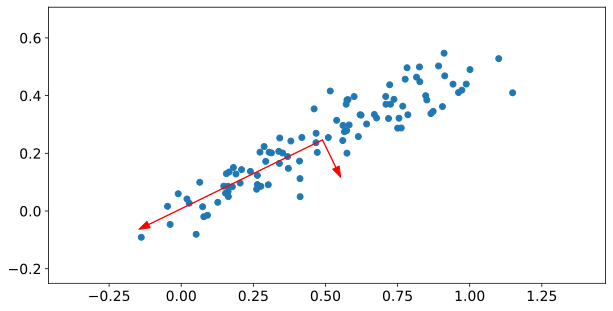

In [ ]:
pca_plot(X,Vals,Mean,P)

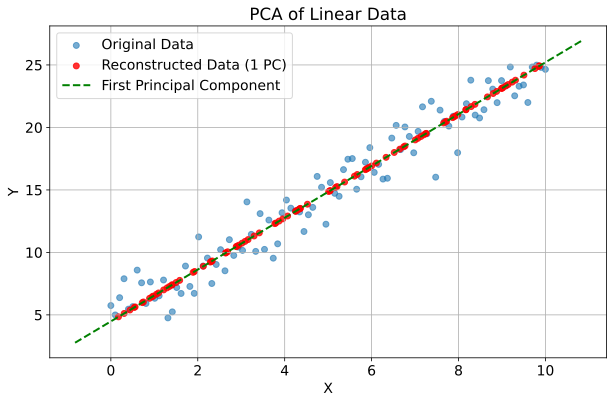

Explained variance ratio of the first principal component: 0.99


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# 1. Generate some linearly related data with noise
np.random.seed(42)
num_samples = 100
x = np.linspace(0, 10, num_samples)
y = 2 * x + 5 + np.random.normal(0, 1.5, num_samples) # Linear relationship with noise

# Combine into a 2D array for PCA
data = np.vstack((x, y)).T

# 2. Standardize the data (important for PCA)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# 3. Perform PCA
# We expect 1 significant component for this linear data
pca = PCA(n_components=1)
pca.fit(scaled_data)

# Transform the data to the principal component space
transformed_data = pca.transform(scaled_data)

# Inverse transform to visualize the effect of dimensionality reduction
# This projects the data back to the original feature space using only the principal components
reconstructed_data = pca.inverse_transform(transformed_data)

# 4. Visualize the results
plt.figure(figsize=(10, 6))

# Original data
plt.scatter(data[:, 0], data[:, 1], alpha=0.6, label='Original Data')

# Reconstructed data (projected onto the principal component)
# Need to inverse transform the scaled reconstructed data back to original scale
reconstructed_original_scale = scaler.inverse_transform(reconstructed_data)
plt.scatter(reconstructed_original_scale[:, 0], reconstructed_original_scale[:, 1],
            alpha=0.8, color='red', label='Reconstructed Data (1 PC)')

# Plot the principal component vector (scaled for visualization)
# The principal component is in the scaled data space, so we need to transform it back
# The first principal component represents the direction of maximum variance
component_vector = pca.components_[0] * pca.explained_variance_[0]**0.5 # Scale by std dev
mean_scaled_data = scaled_data.mean(axis=0)

# To visualize the principal component line, we create points along its direction
# starting from the mean of the scaled data, then inverse transform
start_point_scaled = mean_scaled_data - 2 * component_vector
end_point_scaled = mean_scaled_data + 2 * component_vector
pc_line_scaled = np.vstack((start_point_scaled, end_point_scaled))
pc_line_original_scale = scaler.inverse_transform(pc_line_scaled)

plt.plot(pc_line_original_scale[:, 0], pc_line_original_scale[:, 1],
         color='green', linestyle='--', linewidth=2, label='First Principal Component')

plt.title('PCA of Linear Data')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()

# Print explained variance ratio
print(f"Explained variance ratio of the first principal component: {pca.explained_variance_ratio_[0]:.2f}")

**Robust PCA** factors a matrix into the sum of two matrices, $M = L + S$, where $M$ is the original matrix, $L$ is **low-rank**, and $S$ is **sparse**.  This is what we'll be using for the background removal problem! **Low-rank** means that the matrix has a lot of redundant information-- in this case, it's the background, which is the same in every scene (talk about redundant info!).  **Sparse** means that the matrix has mostly zero entries-- in this case, see how the picture of the foreground (the people) is mostly empty.  (In the case of corrupted data, $S$ is capturing the corrupted entries).

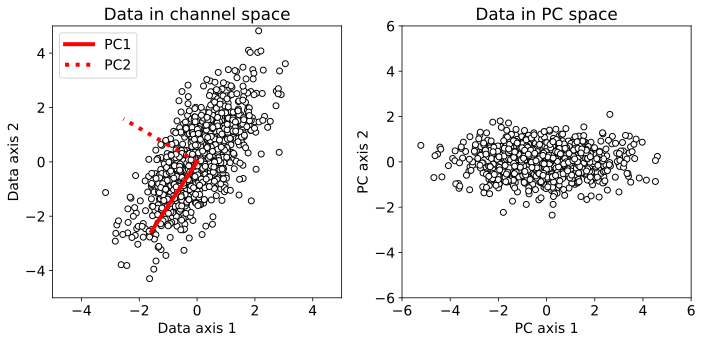

1.9060866127949094
1.9060866127949092


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec # for the subplots

import pandas as pd
import seaborn as sns

# NOTE: these lines define global figure properties used for publication.
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg') # display figures in vector format
plt.rcParams.update({'font.size':14}) # set global font size



# Create some correlated data
X = np.random.randn(1000,2)
X[:,1] = np.sum(X,axis=1)

# quick PCA
evals,evecs = np.linalg.eig( np.cov(X.T,ddof=1) )
scores = X @ evecs


# show in a plot
_,axs = plt.subplots(1,2,figsize=(10,5))
axs[0].plot(X[:,0],X[:,1],'ko',markerfacecolor='w')
axs[0].plot([0,3*evecs[0,1]],[0,3*evecs[1,1]],'r-',linewidth=4,label='PC1')
axs[0].plot([0,3*evecs[0,0]],[0,3*evecs[1,0]],'r:',linewidth=4,label='PC2')
axs[0].axis([-5,5,-5,5])
axs[0].set_xlabel('Data axis 1')
axs[0].set_ylabel('Data axis 2')
axs[0].legend()
axs[0].set_title('Data in channel space')


axs[1].plot(scores[:,1],scores[:,0],'ko',markerfacecolor='w')
axs[1].set_xlabel('PC axis 1')
axs[1].set_ylabel('PC axis 2')
axs[1].axis([-6,6,-6,6])
axs[1].set_title('Data in PC space')

plt.tight_layout()
plt.savefig('Figure_15_01.png',dpi=300)
plt.show()

# Empirical demonstration that variance and squared vector norm are equal.
# You can prove their equivalence by writing down their formulas and assuming the vector is mean-centered.

# extract one variable
q = X[:,1]

# compute variance
var = np.var(q,ddof=1)

# compute squared vector norm (after mean-centering)
norm = np.linalg.norm( q-np.mean(q) )**2

# show that they're the same (with the scaling factor)
print(var)
print(norm / (len(q)-1))

#### HW6-1

1. Write a function to project a design matrix `X` onto its top `k` principal components using the SVD.
2. Modify your function to use `scipy.sparse.linalg.svds`.
3. What is the condition number $\kappa(X^T X)$ expressed in terms of $\kappa(X)$?
4. Plot the singular values of `X` generated above - how might you decide how many principal components to use?
5. Generate synthetic random data with a linear trend along a line and perform your PCA to find the principal components of the data.
6. Plot the original data, reconstructed data (projected data onto the principal component), along the principal components as vectors.
7. Try omitting the centering step in PCA, how do things change?
8. Add a single outlying point to your data; How do the principal components change?